# Echogram Plotting Test

This script demonstrates plotting echograms using fake data.

## Setup

In [3]:
import numpy as np
import datetime
from matplotlib.pyplot import figure, show
from echolab2.processing import processed_data, line
from echolab2.plotting.matplotlib import echogram

## Data

In [4]:
test_data_pings = 100
test_data_samples = 1000
sample_thickness_m = 0.5
ping_interval_ms = 1000.0

fake_Sv = processed_data.ProcessedData('Fake Data', 120000, 'Sv')
fake_Sv.n_samples = test_data_samples
fake_Sv.n_pings = test_data_pings

## Create data arrays

In [5]:
# Create some fake data arrays.
ranges = np.arange(test_data_samples) * sample_thickness_m
times = (np.arange(test_data_pings) * ping_interval_ms) + \
        np.datetime64('2018-03-21T03:30:30', 'ms').astype('float')
data = np.zeros((test_data_pings, test_data_samples), dtype='float32')
data[:, 1::2] = 10.0

# Add the fake data to the ProcessedData object.
fake_Sv.add_attribute('range', ranges)
fake_Sv.add_attribute('ping_time', times.astype('datetime64[ms]'))
fake_Sv.add_attribute('data', data)

# Create lines.
a_line = line.Line(ping_time=np.array([times[0], times[-1]]), data=np.array([
    0, 0]))
n_lines = int((ranges[-1] / (sample_thickness_m * 10)) + 0.5)

## Plot data

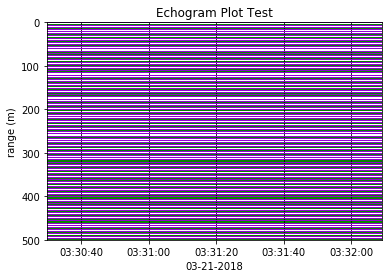

In [6]:
# Create a matplotlib figure to plot our echograms on.
fig_1 = figure()
eg = echogram.Echogram(fig_1, fake_Sv, threshold=[0, 20])
eg.axes.set_title("Echogram Plot Test")

for i in range(n_lines):
    eg.plot_line(a_line, linewidth=1.0)
    a_line = a_line + (sample_thickness_m * 10)

# Display figure.
show()